<a href="https://colab.research.google.com/github/yleessam/tf/blob/main/%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from google.colab.patches import cv2_imshow


In [2]:

# ResNet50 모델을 불러옵니다.
model = ResNet50(weights='imagenet')


102967424/102967424 [==============================] - 1s 0us/step


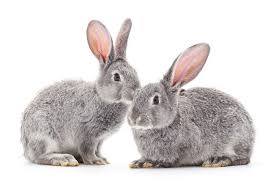

In [25]:
# 이미지를 읽어옵니다.
img1 = cv.imread("images.jpg")
cv2_imshow(img1)


In [26]:
x1 = np.reshape(cv.resize(img1, (224, 224)), (1, 224, 224, 3))
x1 = preprocess_input(x1)


In [27]:
# 예측을 수행합니다.
preds = model.predict(x1)
top5 = decode_predictions(preds, top=5)[0]
print('예측 결과:', top5)

1/1 [==============================] - 0s 23ms/step
예측 결과: [('n02325366', 'wood_rabbit', 0.5132136), ('n02326432', 'hare', 0.48525438), ('n02328150', 'Angora', 0.0013904187), ('n02356798', 'fox_squirrel', 1.8156335e-05), ('n01877812', 'wallaby', 1.1216923e-05)]


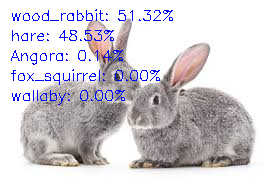

In [28]:
# 예측 결과를 이미지에 표시합니다.
for i, (_, label, score) in enumerate(top5):
    label_text = '{}: {:.2f}%'.format(label, score * 100)
    cv.putText(img1, label_text, (10, 20 + i * 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

cv2_imshow(img1)

##토끼 테스트

In [3]:
# 이미지를 읽어옵니다.
img = cv.imread("rabbit.png")
x = np.reshape(cv.resize(img, (224, 224)), (1, 224, 224, 3))
x = preprocess_input(x)

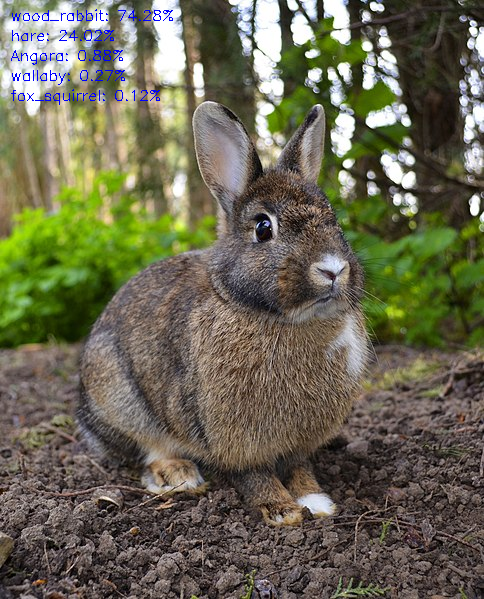

In [4]:

cv2_imshow(img)


# 예측

In [5]:
# 예측을 수행합니다.
preds = model.predict(x)
top5 = decode_predictions(preds, top=5)[0]
print('예측 결과:', top5)

35363/35363 [==============================] - 0s 0us/step
예측 결과: [('n02325366', 'wood_rabbit', 0.7429795), ('n02326432', 'hare', 0.23828243), ('n02328150', 'Angora', 0.008462844), ('n01877812', 'wallaby', 0.0027085103), ('n02356798', 'fox_squirrel', 0.0016545268)]


In [6]:
# 예측 결과를 이미지에 표시합니다.
for i, (_, label, score) in enumerate(top5):
    label_text = '{}: {:.2f}%'.format(label, score * 100)
    cv.putText(img, label_text, (10, 20 + i * 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)


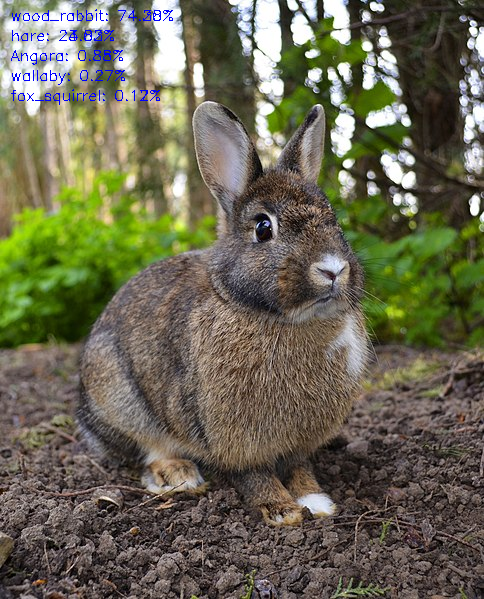

In [7]:
# 이미지를 코랩에서 표시합니다.
cv2_imshow(img)
